In [1]:
import numpy as np 
import pandas as pd   
import tensorflow as tf   
import matplotlib.pyplot as plt    
import seaborn as sns      

In [2]:
transaction_data = pd.read_csv("C:/Users/madam/Downloads/transaction_data.csv")
purchase_behaviour = pd.read_csv("C:/Users/madam/Downloads/purchase_behaviour.csv")

In [3]:
transaction_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase_behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_data.shape

(264836, 8)

In [6]:
purchase_behaviour.shape

(72637, 3)

In [7]:
purchase_behaviour['LYLTY_CARD_NBR'].nunique()

72637

In [8]:
transaction_data['LYLTY_CARD_NBR'].nunique()

72637

both the dataset can be merged for better intutive analysis on the basis of common column "LYLTY_CARD_NBR"

In [9]:
merged_df = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how="outer")
(merged_df.head(5))

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [10]:
merged_df.shape

(264836, 10)

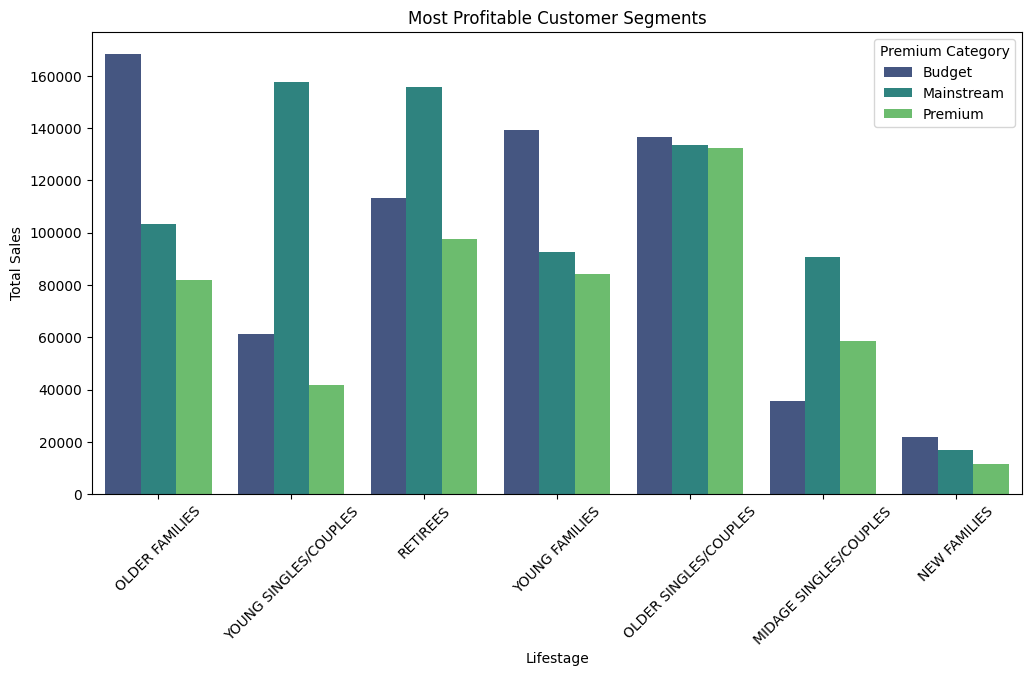

In [12]:
profit_by_segment = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

most_profitable_segment = profit_by_segment.sort_values(by="TOT_SALES", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable_segment, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="viridis")
plt.title("Most Profitable Customer Segments")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Lifestage")
plt.legend(title="Premium Category")
plt.show()

which lifestage segment is most profitable and what type premium_customer category, exists in each category ??

in older families with budget the products are purchased 
in young singles/couples families with mainstream category the products are purchased 
in retires families with mainstream category the products are purchased 
in young families with budget category the products are purchased 
in older singles/couples category slightly budget is preferred although all three categories are equally contributing 
in midage singles/couples mainstream budget is preferred above all 
in new families budget > mainstream > premium this is the order of prefrence 

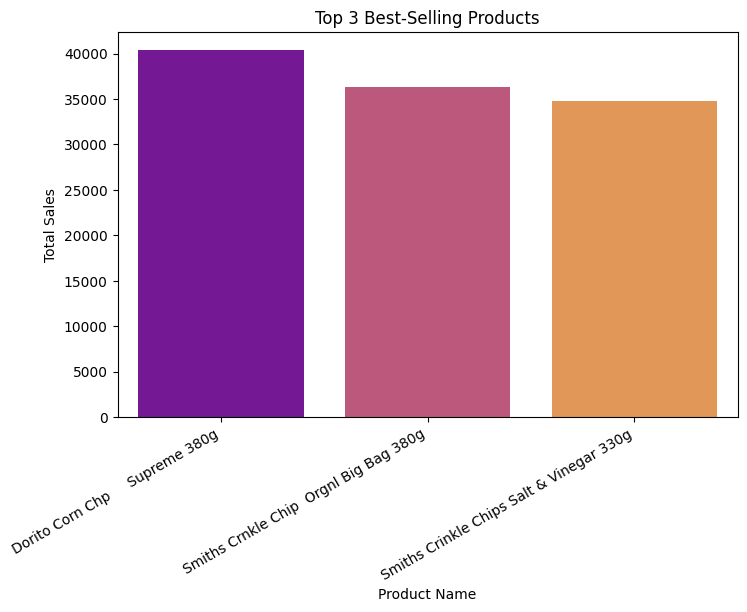

In [13]:
top_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(3)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="plasma")
plt.title("Top 3 Best-Selling Products")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Total Sales")
plt.xlabel("Product Name")
plt.show()

top 3 best selling products are 
Dorito Corn Chp 
Smiths Crnkle Chip Orgnl Big Bang 380g 
Smiths Crinkle Chips Salt & Vinegar 330g 

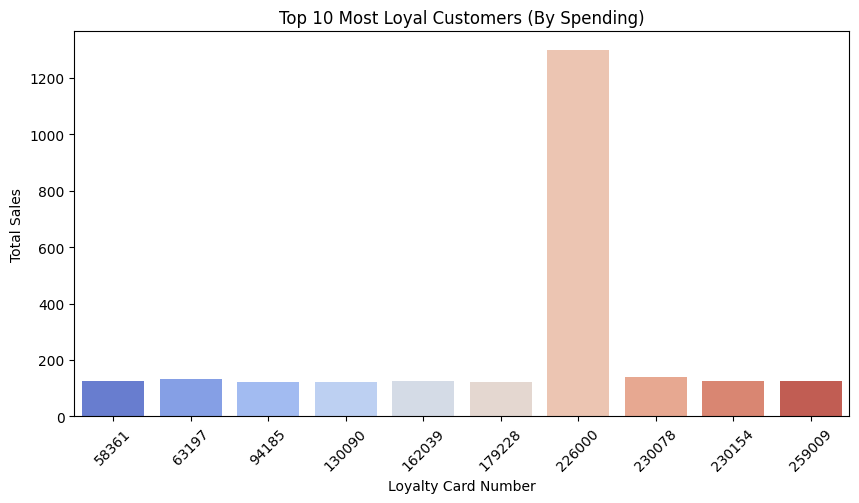

In [14]:
loyal_customers = merged_df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=loyal_customers, x="LYLTY_CARD_NBR", y="TOT_SALES", palette="coolwarm")
plt.title("Top 10 Most Loyal Customers (By Spending)")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Loyalty Card Number")
plt.show()


top 10 most loyal customers are 
226000
230078
230154
259009
179228
162039
130090
94185
63197
58361

Top 3 Most Popular Products Among Different Customer Groups:
                 LIFESTAGE PREMIUM_CUSTOMER  \
0   MIDAGE SINGLES/COUPLES           Budget   
1   MIDAGE SINGLES/COUPLES           Budget   
2   MIDAGE SINGLES/COUPLES           Budget   
3   MIDAGE SINGLES/COUPLES       Mainstream   
4   MIDAGE SINGLES/COUPLES       Mainstream   
..                     ...              ...   
58   YOUNG SINGLES/COUPLES       Mainstream   
59   YOUNG SINGLES/COUPLES       Mainstream   
60   YOUNG SINGLES/COUPLES          Premium   
61   YOUNG SINGLES/COUPLES          Premium   
62   YOUNG SINGLES/COUPLES          Premium   

                                   PROD_NAME  TOT_SALES  
0           Dorito Corn Chp     Supreme 380g      734.5  
1     Kettle Mozzarella   Basil & Pesto 175g      675.0  
2          Smiths Crinkle      Original 330g      632.7  
3   Smiths Crinkle Chips Salt & Vinegar 330g     2103.3  
4                       Cheezels Cheese 330g     2012.1  
..                        

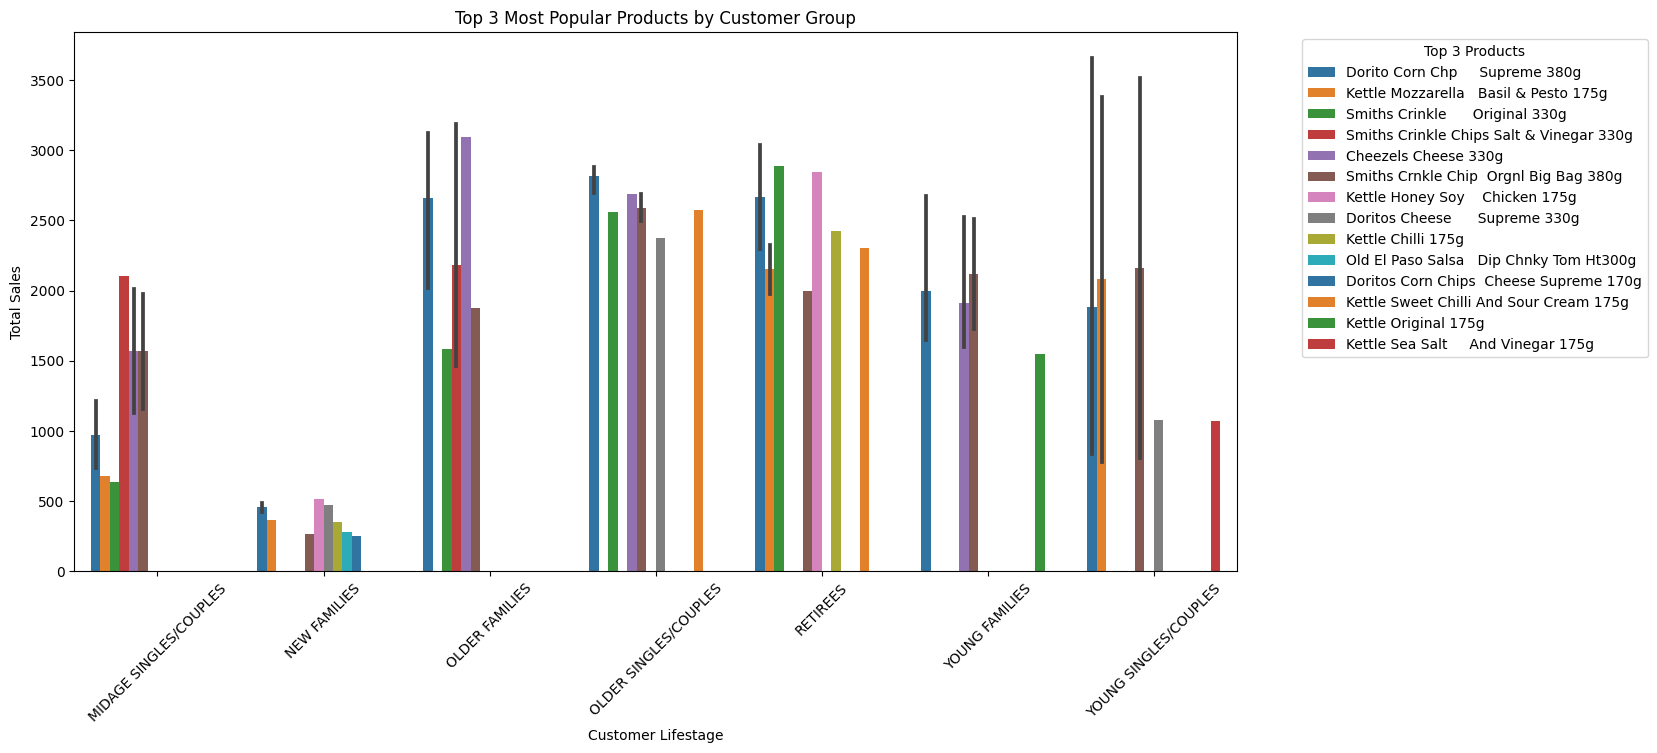

In [15]:
grouped_df = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NAME"])["TOT_SALES"].sum().reset_index()

top_3_products = grouped_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).apply(lambda x: x.nlargest(3, "TOT_SALES")).reset_index(drop=True)

print("Top 3 Most Popular Products Among Different Customer Groups:")
print(top_3_products)

plt.figure(figsize=(15, 7))
sns.barplot(data=top_3_products, x="LIFESTAGE", y="TOT_SALES", hue="PROD_NAME", palette="tab10")
plt.title("Top 3 Most Popular Products by Customer Group")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Customer Lifestage")
plt.legend(title="Top 3 Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

each lifestage most preferred product are :___

midage singles/couples :- cheezels cheese 330g, Smiths crnkle chip orgnl big bag 380g, Doritos Corn Chips Cheese Supreme 170g 

new families:- Doritos Corn Chips Cheese Supreme 170g

Older families:- Doritos Corn Chips Cheese Supreme 170g, Kettle Ssea Salt and Vinegar 175g 

Older Singles/Couples:- Doritos Corn Chips Cheese Supreme 170g, Smiths crnkle chip orgnl big bag 380g

Retires:- Doritos Corn Chips Cheese Supreme 170g, Kettle Sweet Chilli and Sour Cream 175g 

Young Families:- Doritos Corn Chips Cheese Supreme 170g, Smiths crnkle chip orgnl big bag 380g, cheezels cheese 330g

Young Singles/Couples:-  Doritos Corn Chips Cheese Supreme 170g, Kettle Sweet Chilli and Sour Cream 175g,  Smiths crnkle chip orgnl big bag 380g

Most Popular Product in Every Premium Category:
    PREMIUM_CUSTOMER                         PROD_NAME  TOT_SALES
11            Budget  Dorito Corn Chp     Supreme 380g   13068.25
125       Mainstream  Dorito Corn Chp     Supreme 380g   15366.00
239          Premium  Dorito Corn Chp     Supreme 380g   11917.75


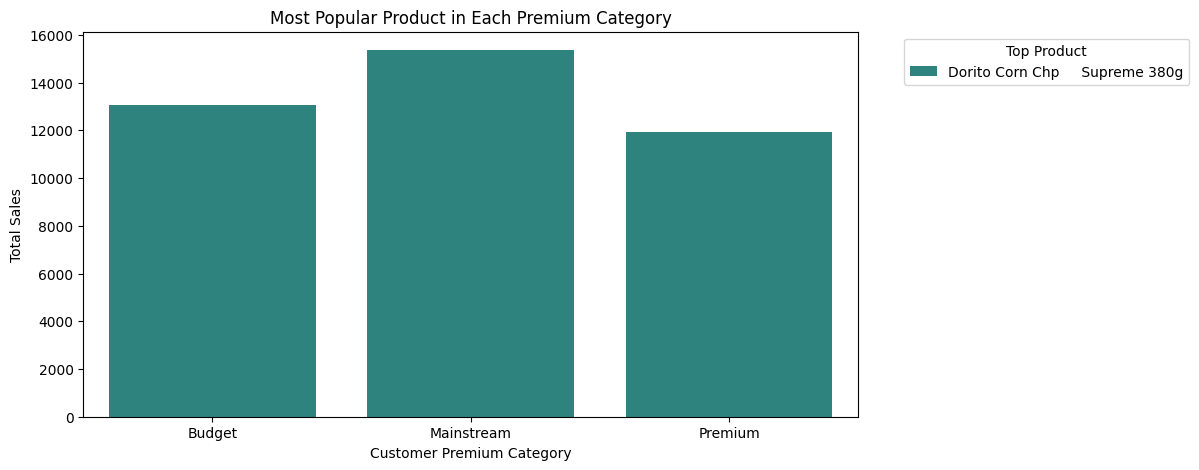

In [16]:
grouped_df = merged_df.groupby(["PREMIUM_CUSTOMER", "PROD_NAME"])["TOT_SALES"].sum().reset_index()

most_popular_products = grouped_df.loc[grouped_df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].idxmax()]

print("Most Popular Product in Every Premium Category:")
print(most_popular_products)

plt.figure(figsize=(10, 5))
sns.barplot(data=most_popular_products, x="PREMIUM_CUSTOMER", y="TOT_SALES", hue="PROD_NAME", palette="viridis")
plt.title("Most Popular Product in Each Premium Category")
plt.ylabel("Total Sales")
plt.xlabel("Customer Premium Category")
plt.legend(title="Top Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

most popular product in customer_premium category is Dorito Corn Chp Supreme 380g  

peak sales of differnt product

Peak Sales Date for Each Product:
                               DATE                                 PROD_NAME  \
13203 1970-01-01 00:00:00.000043399                         Burger Rings 220g   
559   1970-01-01 00:00:00.000043287                  CCs Nacho Cheese    175g   
34342 1970-01-01 00:00:00.000043587                         CCs Original 175g   
10275 1970-01-01 00:00:00.000043373                  CCs Tasty Cheese    175g   
12529 1970-01-01 00:00:00.000043393            Cheetos Chs & Bacon Balls 190g   
31743 1970-01-01 00:00:00.000043564                        Cheetos Puffs 165g   
39200 1970-01-01 00:00:00.000043630                      Cheezels Cheese 330g   
7336  1970-01-01 00:00:00.000043347                  Cheezels Cheese Box 125g   
15247 1970-01-01 00:00:00.000043417            Cobs Popd Sea Salt  Chips 110g   
24856 1970-01-01 00:00:00.000043503    Cobs Popd Sour Crm  &Chives Chips 110g   
3388  1970-01-01 00:00:00.000043312  Cobs Popd Swt/Chlli &Sr/Cream Chips 11

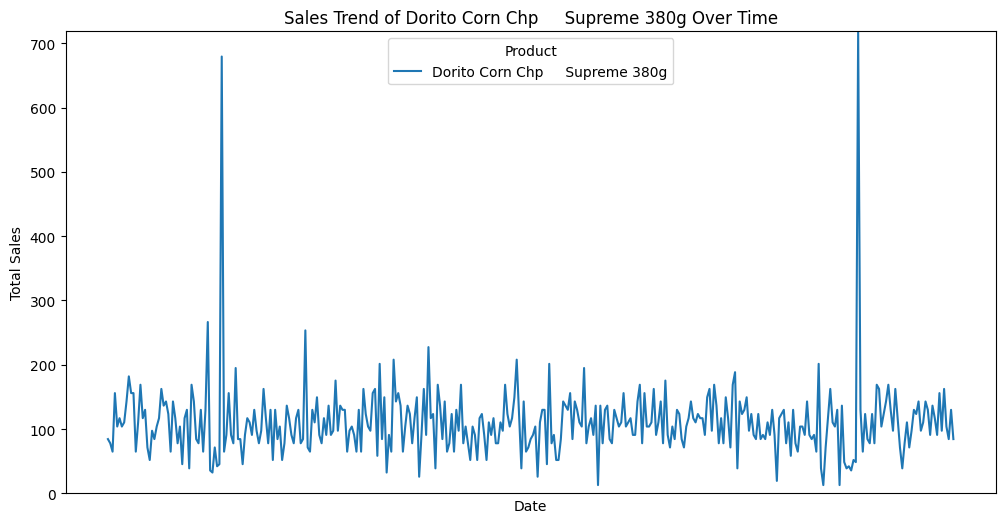

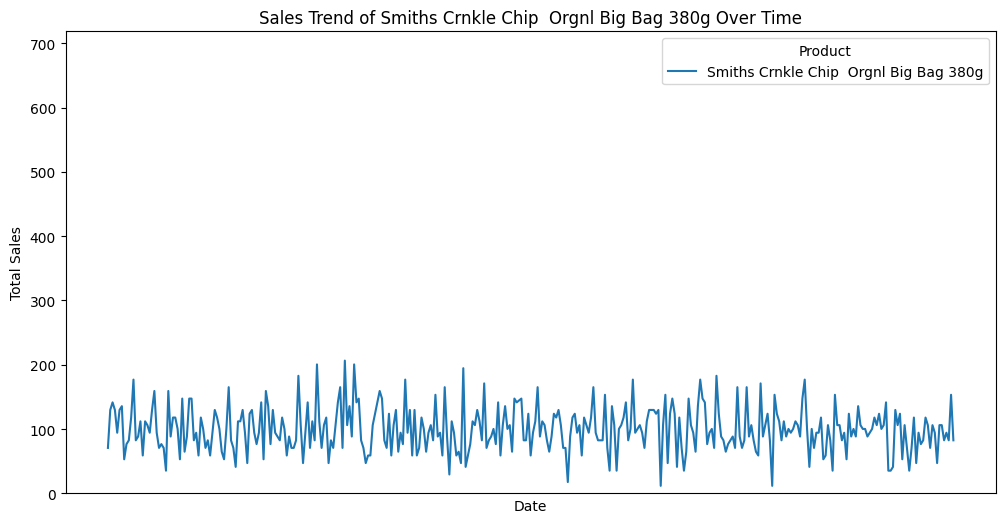

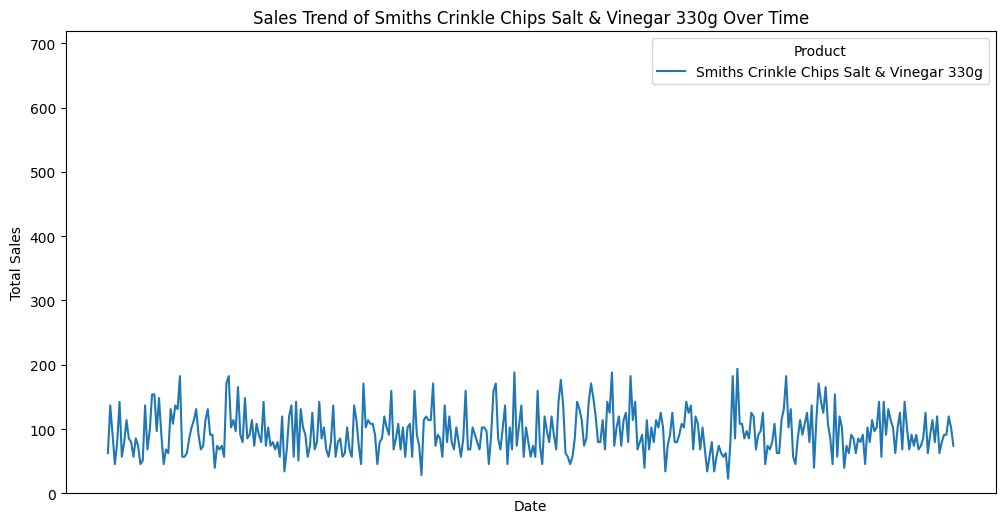

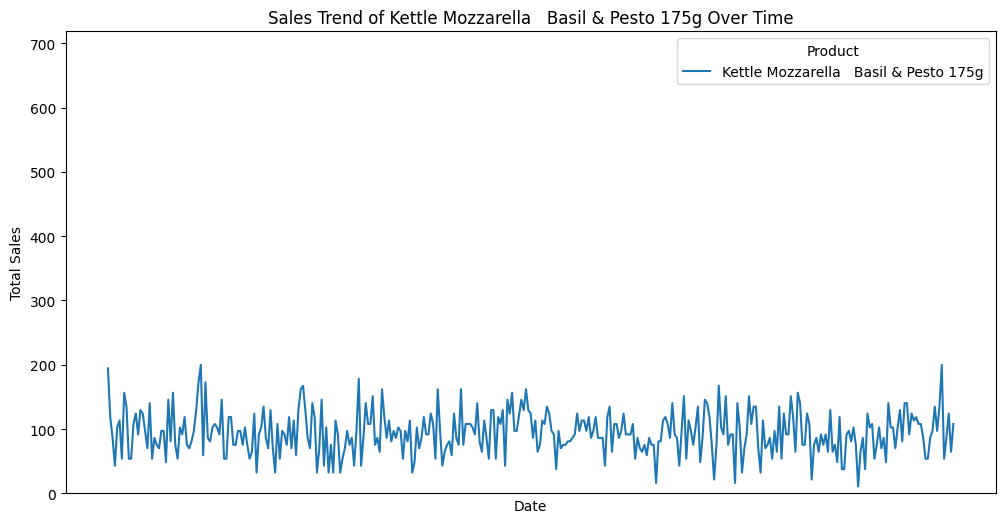

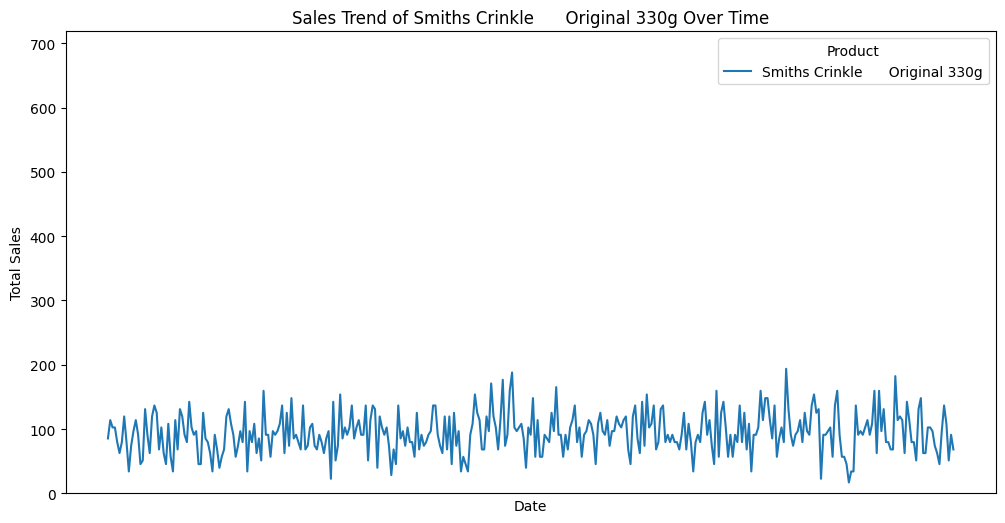

In [19]:
merged_df["DATE"] = pd.to_datetime(merged_df["DATE"])

grouped_df = merged_df.groupby(["DATE", "PROD_NAME"])["TOT_SALES"].sum().reset_index()

peak_sales = grouped_df.loc[grouped_df.groupby("PROD_NAME")["TOT_SALES"].idxmax()]

print("Peak Sales Date for Each Product:")
print(peak_sales.head(20))

top_products = grouped_df.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(5).index  # Select top 5 products

y_max = grouped_df["TOT_SALES"].max()

for product in top_products:
    plt.figure(figsize=(12, 6))
    product_data = grouped_df[grouped_df["PROD_NAME"] == product]
    plt.plot(product_data["DATE"], product_data["TOT_SALES"], label=product)
    plt.title(f"Sales Trend of {product} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.ylim(0, y_max) 
    plt.xticks(rotation=45)
    plt.legend(title="Product")
    plt.show()

Store with the Highest Number of Products Sold:

In [20]:
grouped_df = merged_df.groupby(["STORE_NBR", "PROD_NAME"])["TOT_SALES"].sum().reset_index()

highest_sales_product_store = grouped_df.loc[grouped_df.groupby("STORE_NBR")["TOT_SALES"].idxmax()]

print("Store with the Highest Number of Products Sold:")
print(highest_sales_product_store.head(20))

Store with the Highest Number of Products Sold:
      STORE_NBR                                 PROD_NAME  TOT_SALES
6             1                      Cheezels Cheese 330g      57.00
154           2   Kettle Tortilla ChpsBtroot&Ricotta 150g      59.80
247           3    Kettle Mozzarella   Basil & Pesto 175g     421.20
327           4    Smiths Crnkle Chip  Orgnl Big Bag 380g     383.50
378           5     Kettle Sensations   Siracha Lime 150g     197.80
486           6          Kettle Honey Soy    Chicken 175g      70.20
609           7         Smiths Crinkle      Original 330g     364.80
643           8                        Kettle Chilli 175g     145.80
693           9          Doritos Cheese      Supreme 330g     108.30
825          10          Kettle Honey Soy    Chicken 175g     194.40
907          11  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       3.80
932          12      Kettle Sea Salt     And Vinegar 175g     205.20
1005         13   Kettle Sweet Chilli And Sour Cream 17

In [21]:
pd.set_option('display.max_rows', 272)

In [22]:
highest_sales_product_store

,STORE_NBR,PROD_NAME,TOT_SALES
6,1,Cheezels Cheese 330g,57.00
154,2,Kettle Tortilla ChpsBtroot&Ricotta 150g,59.80
247,3,Kettle Mozzarella Basil & Pesto 175g,421.20
327,4,Smiths Crnkle Chip Orgnl Big Bag 380g,383.50
378,5,Kettle Sensations Siracha Lime 150g,197.80
486,6,Kettle Honey Soy Chicken 175g,70.20
609,7,Smiths Crinkle Original 330g,364.80
643,8,Kettle Chilli 175g,145.80
693,9,Doritos Cheese Supreme 330g,108.30
825,10,Kettle Honey Soy Chicken 175g,194.40


best selling product in each store 

In [26]:
# Group by STORE_NBR and PROD_NAME to get the total sales for each product in each store
grouped_df = merged_df.groupby(["STORE_NBR", "PROD_NAME"])["TOT_SALES"].sum().reset_index()

best_selling_product_store = grouped_df.loc[grouped_df.groupby("STORE_NBR")["TOT_SALES"].idxmax()]

print("Best Selling Product in Each Store:")
print(best_selling_product_store)

Best Selling Product in Each Store:
       STORE_NBR                                 PROD_NAME  TOT_SALES
6              1                      Cheezels Cheese 330g      57.00
154            2   Kettle Tortilla ChpsBtroot&Ricotta 150g      59.80
247            3    Kettle Mozzarella   Basil & Pesto 175g     421.20
327            4    Smiths Crnkle Chip  Orgnl Big Bag 380g     383.50
378            5     Kettle Sensations   Siracha Lime 150g     197.80
486            6          Kettle Honey Soy    Chicken 175g      70.20
609            7         Smiths Crinkle      Original 330g     364.80
643            8                        Kettle Chilli 175g     145.80
693            9          Doritos Cheese      Supreme 330g     108.30
825           10          Kettle Honey Soy    Chicken 175g     194.40
907           11  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       3.80
932           12      Kettle Sea Salt     And Vinegar 175g     205.20
1005          13   Kettle Sweet Chilli And Sour Cream 

In [23]:
loyal_customers = {226000, 230078, 230154, 259009, 179228, 162039, 130090, 94185, 63197, 58361}

loyal_df = merged_df[merged_df['LYLTY_CARD_NBR'].isin(loyal_customers)]

purchase_summary = loyal_df.groupby('LYLTY_CARD_NBR').agg({
    'TOT_SALES': 'sum', 
    'PROD_QTY': 'sum'
}).rename(columns={'TOT_SALES': 'Total_Spent', 'PROD_QTY': 'Total_Products_Bought'})

characteristics = loyal_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')

sns.set_style("whitegrid")

Total Spending per Loyal Customer

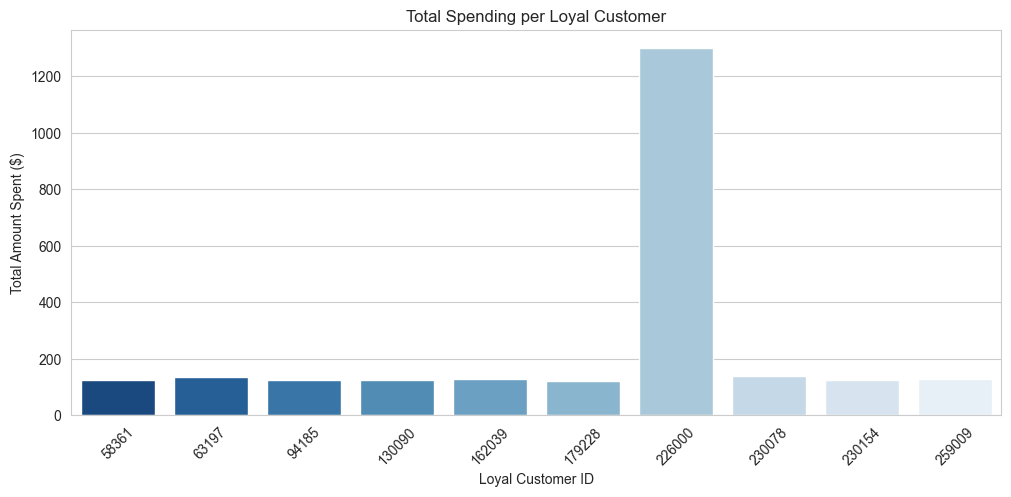

In [24]:
plt.figure(figsize=(12, 5))
sns.barplot(x=purchase_summary.index.astype(str), y=purchase_summary['Total_Spent'], palette="Blues_r")
plt.title("Total Spending per Loyal Customer")
plt.xlabel("Loyal Customer ID")
plt.ylabel("Total Amount Spent ($)")
plt.xticks(rotation=45)
plt.show()

Total Products Bought per Loyal Customer

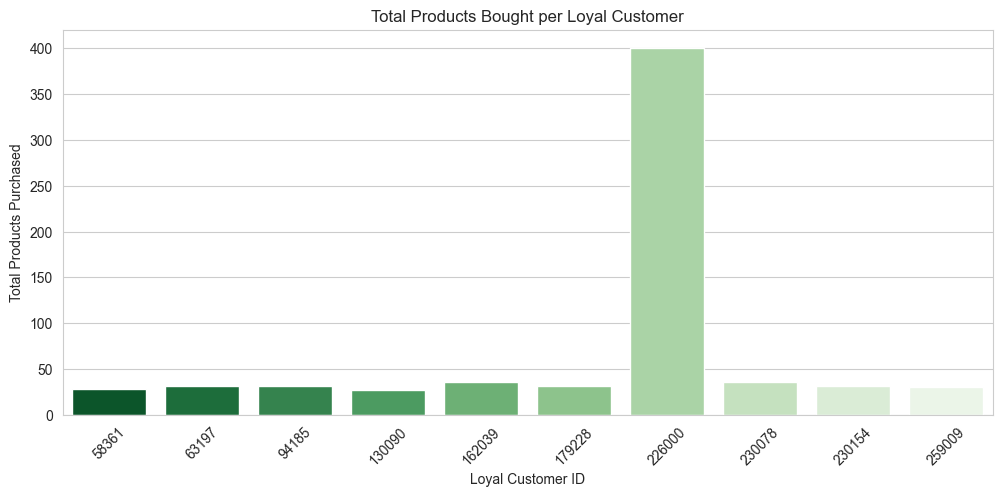

In [25]:

plt.figure(figsize=(12, 5))
sns.barplot(x=purchase_summary.index.astype(str), y=purchase_summary['Total_Products_Bought'], palette="Greens_r")
plt.title("Total Products Bought per Loyal Customer")
plt.xlabel("Loyal Customer ID")
plt.ylabel("Total Products Purchased")
plt.xticks(rotation=45)
plt.show()

Lifestage & Premium Status distribution

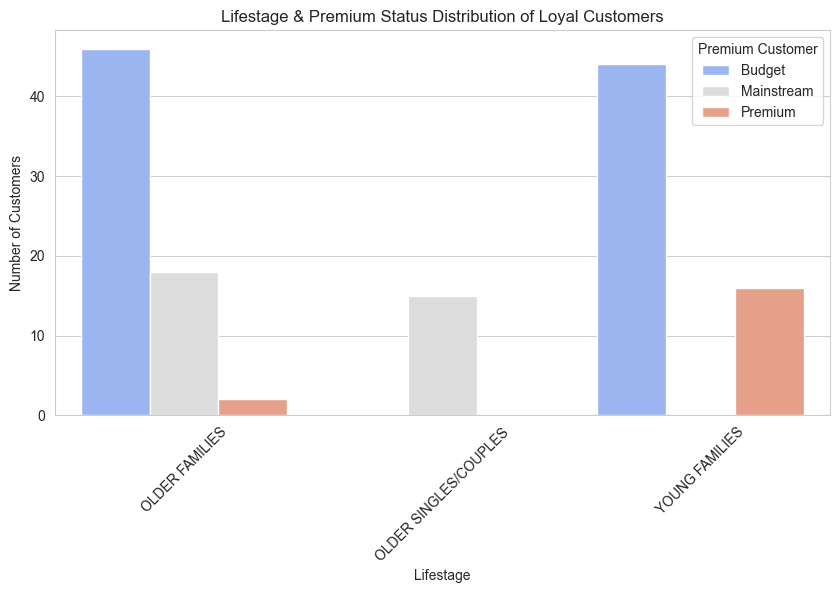

In [26]:

plt.figure(figsize=(10, 5))
sns.barplot(x='LIFESTAGE', y='Count', hue='PREMIUM_CUSTOMER', data=characteristics, palette="coolwarm")
plt.title("Lifestage & Premium Status Distribution of Loyal Customers")
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")
plt.show()

loyal customers exists only in Older and young families, where older consist of both singles and couples both  

distribution of loyal customers on various stores 

Stores of Loyal Customers:
    STORE_NBR  Transaction_Count
0        230                 31
1        162                 18
2        179                 16
3         94                 16
4         63                 15
5        259                 15
6        130                 14
7         58                 14
8        226                  2


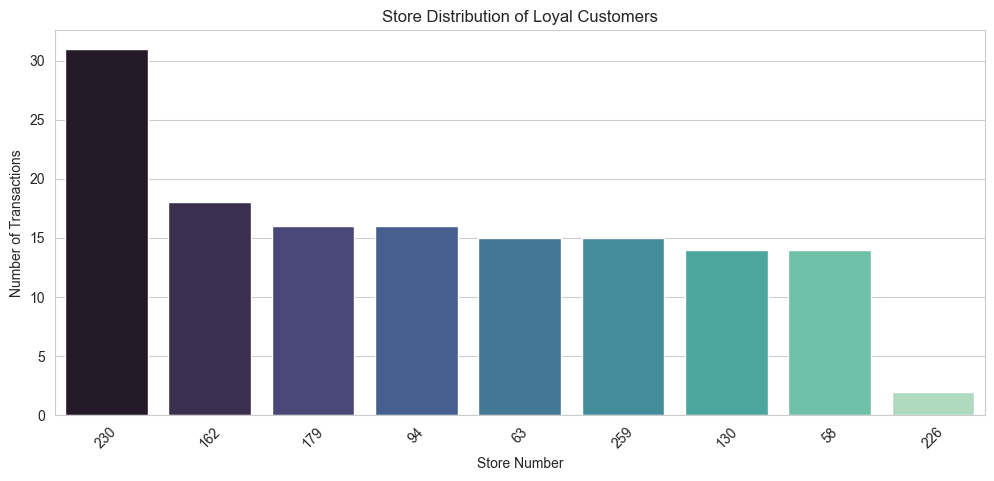

In [27]:
store_counts = loyal_df['STORE_NBR'].value_counts().reset_index()
store_counts.columns = ['STORE_NBR', 'Transaction_Count']

print("Stores of Loyal Customers:\n", store_counts)

plt.figure(figsize=(12, 5))
sns.barplot(x=store_counts['STORE_NBR'].astype(str), y=store_counts['Transaction_Count'], palette="mako")
plt.title("Store Distribution of Loyal Customers")
plt.xlabel("Store Number")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()
